## Unsupervised Learning

## 1. Import necessary libraries 

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import warnings
warnings.filterwarnings('ignore')


## 2. Load the Data 

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Sowmy\\Downloads\\final_Dataset_Cleaned.csv")

# Show first few rows
df


,country_id,country_name,country_code,cause_id,cause_name,year,mortality_rate,corruption_index,physicians_per_1000,beds_per_1000,health_expenditure_per_capita,percent_gdp_spent_on_healthcare,happinessscore
0,160,Afghanistan,AFG,688,Transport injuries,2010,27.601971,0.958,0.245,0.43,148.761110,8.569672,4.258
1,160,Afghanistan,AFG,957,Enteric infections,2010,36.597126,0.958,0.245,0.43,148.761110,8.569672,4.258
2,160,Afghanistan,AFG,956,Respiratory infections and tuberculosis,2010,120.676177,0.958,0.245,0.43,148.761110,8.569672,4.258
3,160,Afghanistan,AFG,955,HIV/AIDS and sexually transmitted infections,2010,1.806461,0.958,0.245,0.43,148.761110,8.569672,4.258
4,160,Afghanistan,AFG,717,Self-harm and interpersonal violence,2010,54.353014,0.958,0.245,0.43,148.761110,8.569672,4.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36640,198,Zimbabwe,ZWE,508,Chronic respiratory diseases,2021,20.468769,0.826,0.189,2.00,63.136967,2.785717,2.995
36641,198,Zimbabwe,ZWE,688,Transport injuries,2021,20.355806,0.826,0.189,2.00,63.136967,2.785717,2.995
36642,198,Zimbabwe,ZWE,386,Nutritional deficiencies,2021,18.741692,0.826,0.189,2.00,63.136967,2.785717,2.995
36643,198,Zimbabwe,ZWE,542,Neurological disorders,2021,9.387665,0.826,0.189,2.00,63.136967,2.785717,2.995


In [59]:
# Reference columns for interpretation
reference_columns = ['country_name', 'cause_name', 'year']

# Numeric columns for unsupervised learning
numeric_columns = ['mortality_rate', 'corruption_index', 'physicians_per_1000',
                   'beds_per_1000', 'health_expenditure_per_capita',
                   'percent_gdp_spent_on_healthcare', 'happinessscore']

# Extract numeric data
X = df[numeric_columns].copy()

# Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns)

# Add back reference columns
X_scaled_df[reference_columns] = df[reference_columns].reset_index(drop=True)



## 3. PCA Analysis

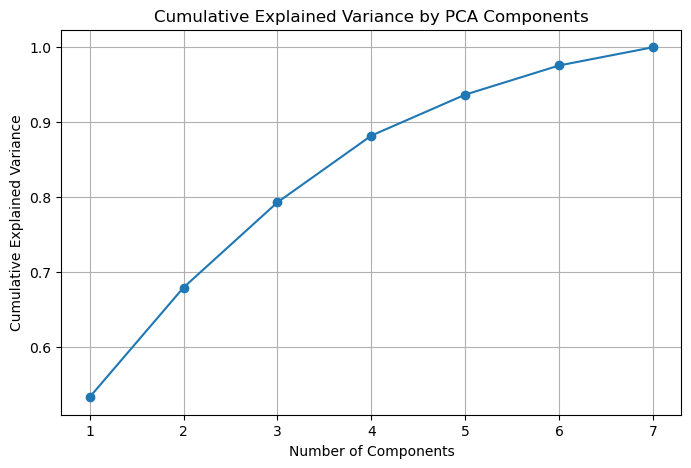

In [5]:
# Fit PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)


#  Cumulative Explained Variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


The cumulative Explained Variance plot shows that the first four principal components captures approximately 88% of the total variance in the dataset. After 4th component the other components are giving little information so reducing data to first 4 principal components would be useful  for clustering.

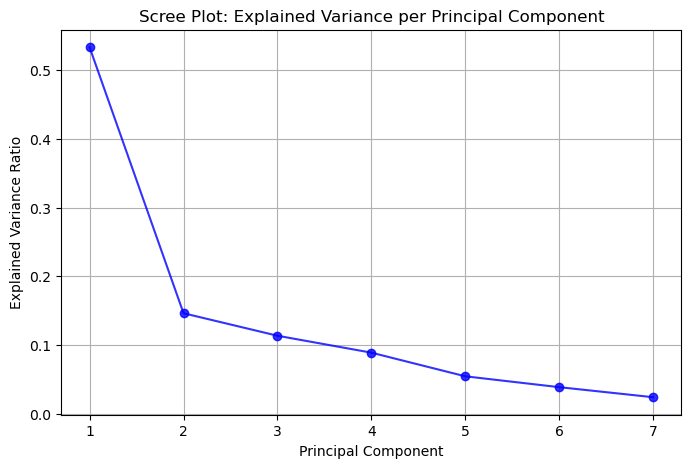

In [6]:
# Scree plot 
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), 
         explained_variance_ratio, 
         marker='o', linestyle='-', color='b', alpha=0.8)
plt.title('Scree Plot: Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


The above scree plot shows a large drop after the first principal components (53%), with the second component contributing about 15%. While there is noticeable drop at PC2, the explained variance continues to decreade gradually with PC3 (11%) and PC4(9%). After the fourth component the curve is flat . Therefore four components are would be useful for clustering.

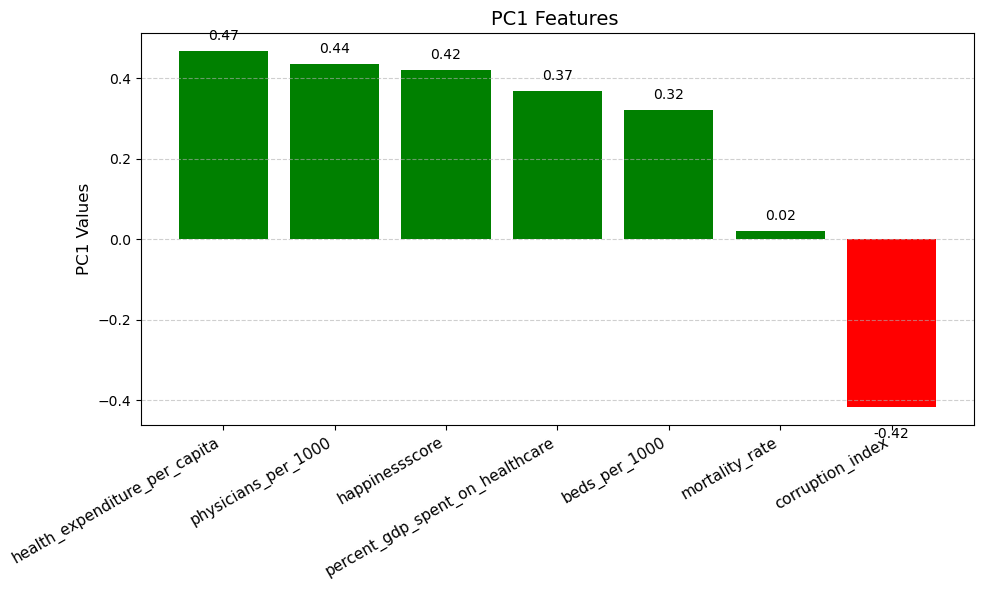

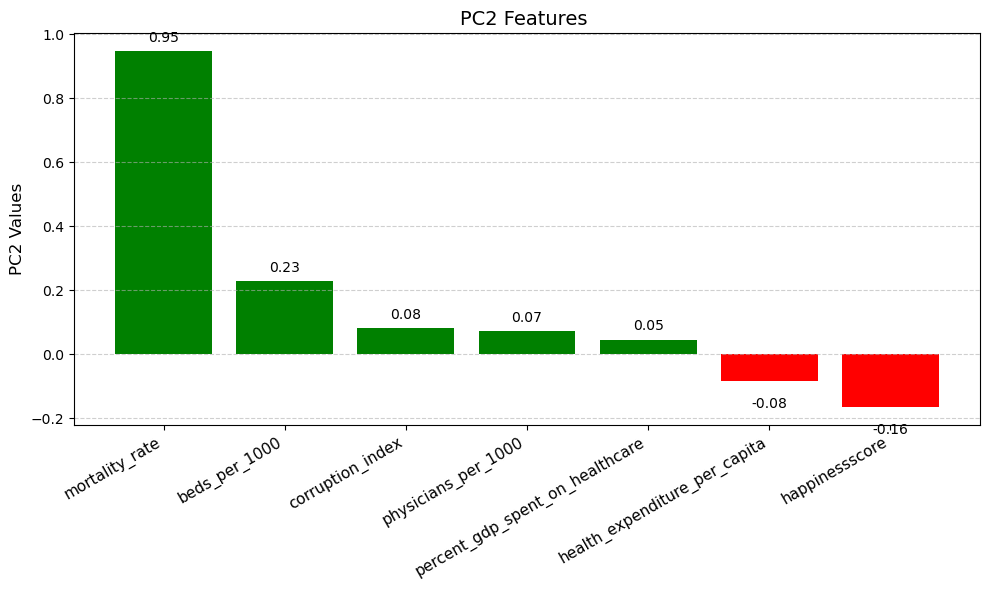

In [75]:
# pca features
def plot_pca_loadings(pca, component_number, feature_names):
    # Get component loadings:
    loadings = pca.components_[component_number]

    # Pair with feature names:
    loading_tuples = list(zip(feature_names, loadings))

    # Sort by loading value:
    loading_tuples_sorted = sorted(loading_tuples, key=lambda x: x[1], reverse=True)

    # Prepare:
    features_sorted = [x[0] for x in loading_tuples_sorted]
    loadings_sorted = [x[1] for x in loading_tuples_sorted]

    # Plot:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(features_sorted, loadings_sorted, color=['green' if v >= 0 else 'red' for v in loadings_sorted])

    # Add value labels:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height + 0.02 if height >= 0 else height - 0.05, 
                 f'{height:.2f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

    plt.ylabel(f"PC{component_number + 1} Values", fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=11)
    plt.title(f"PC{component_number + 1} Features ", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_pca_loadings(pca, component_number=0, feature_names=numeric_columns)
plot_pca_loadings(pca, component_number=1, feature_names=numeric_columns)


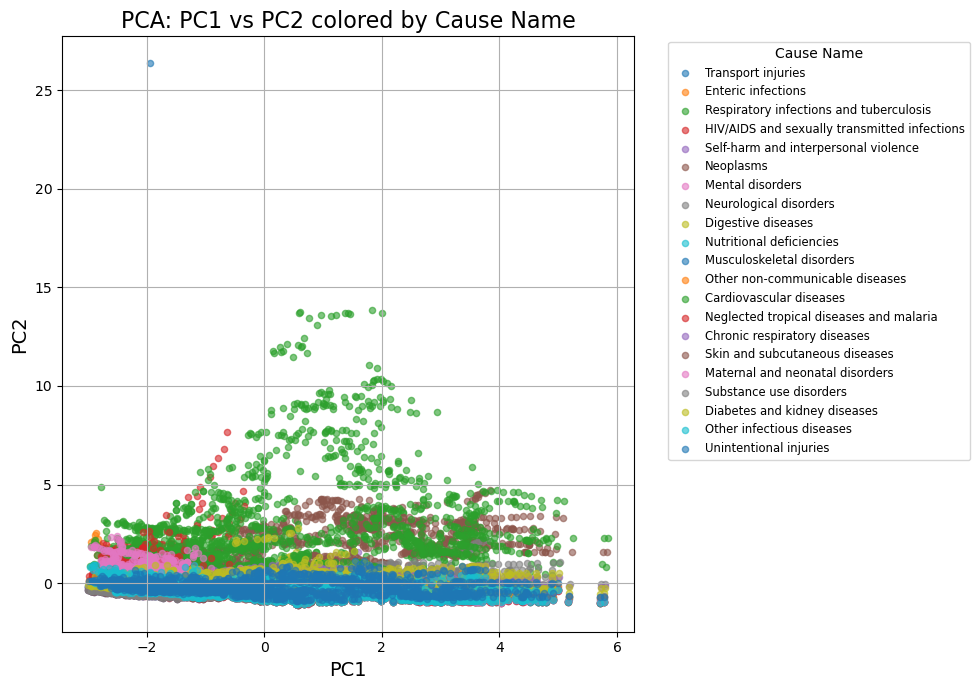

In [44]:
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cause_name': df['cause_name'].values  
})
plt.figure(figsize=(10, 7))
for cause in pca_df['cause_name'].unique():
    subset = pca_df[pca_df['cause_name'] == cause]
    plt.scatter(subset['PC1'], subset['PC2'], label=cause, alpha=0.6, s=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Cause Name')
plt.title('PCA: PC1 vs PC2 colored by Cause Name', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


This plot shows how different diseases are spread out based on healthcare factors, like health spending, number of doctors, and mortality rates. Some diseases appear in many types of healthcare systems, while others are more alike.

## 4. K means clustering

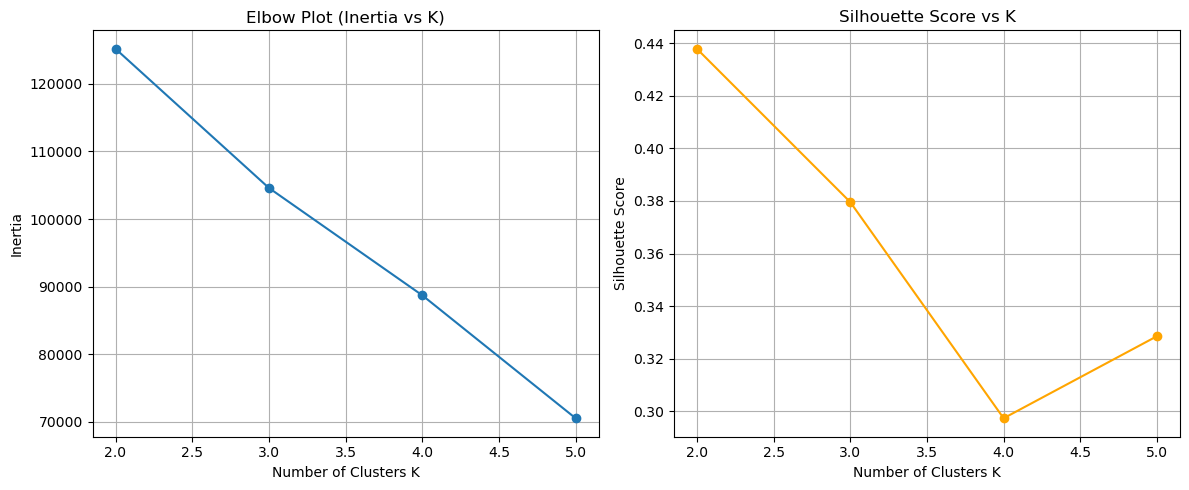

In [12]:
# Use first 4 PCs based on Scree Plot and explained variance
X_cluster = X_pca[:, :4]

#Elbow Plot + Silhouette Score → to choose best K:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 6)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, labels))

# Plot Inertia (Elbow Plot)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Plot (Inertia vs K)")
plt.xlabel("Number of Clusters K")
plt.ylabel("Inertia")
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


From the above we can see that K =2 gives best silhouette score, but may be too coarse so K =3 is a reasonable balance as ineria reduces significantly. At k = 4-5silhouette drops and inertia continues to decrease but with diminishing returns. Therefore I would pick K =3 for clustering.

In [15]:
# Fit KMeans with chosen K
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(X_cluster)

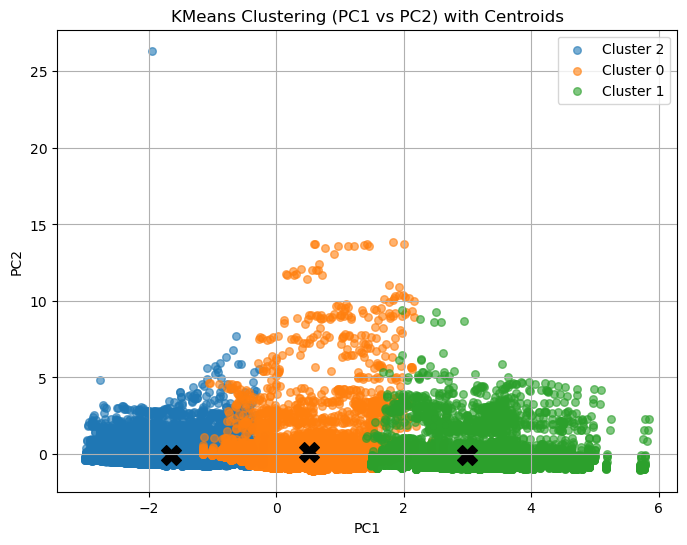

In [43]:
# Create a new dataframe with cluster labels
pca_df_cluster = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': final_labels
})

plt.figure(figsize=(8,6))

# Plot each cluster
for cluster in pca_df_cluster['Cluster'].unique():
    subset = pca_df_cluster[pca_df_cluster['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=30)

    # Compute centroid
    centroid_x = subset['PC1'].mean()
    centroid_y = subset['PC2'].mean()

    # Plot centroid as a big red X
    plt.scatter(centroid_x, centroid_y, marker='X', color='black', s=200, edgecolor='black')

plt.legend()
plt.title('KMeans Clustering (PC1 vs PC2) with Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [86]:
# Columns to exclude
exclude_cols = ['country_id', 'cause_id', 'year', 'Hierarchical_Ward_Cluster', 'Cluster']

# Select only numeric columns that are not excluded
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns = [col for col in numeric_columns if col not in exclude_cols]

# Groupby mean
cluster_means = df.groupby('Cluster')[numeric_columns].mean()

for cluster_id in cluster_means.index:
    print(f"\nCluster {cluster_id}:")
    for col in cluster_means.columns:
        print(f"{col}: {cluster_means.loc[cluster_id, col]:.2f}")



Cluster 0:
mortality_rate: 37.89
corruption_index: 0.45
physicians_per_1000: 2.72
beds_per_1000: 4.11
health_expenditure_per_capita: 1458.92
percent_gdp_spent_on_healthcare: 6.47
happinessscore: 5.78

Cluster 1:
mortality_rate: 42.26
corruption_index: 0.08
physicians_per_1000: 3.89
beds_per_1000: 4.37
health_expenditure_per_capita: 4580.45
percent_gdp_spent_on_healthcare: 9.82
happinessscore: 6.82

Cluster 2:
mortality_rate: 35.78
corruption_index: 0.67
physicians_per_1000: 0.51
beds_per_1000: 1.30
health_expenditure_per_capita: 326.39
percent_gdp_spent_on_healthcare: 5.21
happinessscore: 4.64


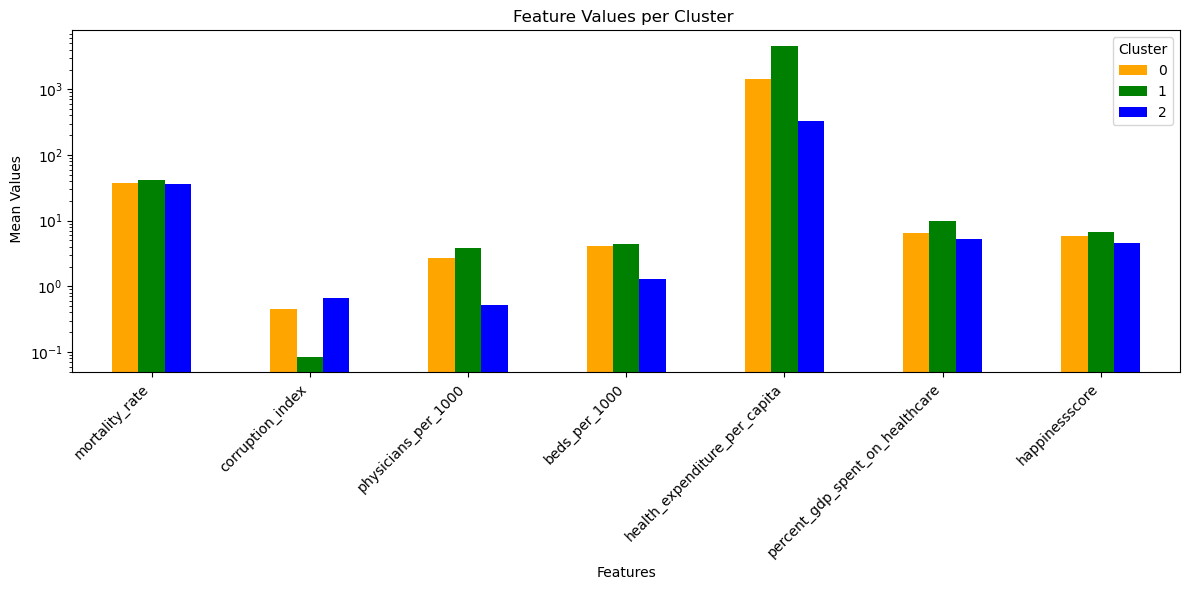

In [99]:

#  cluster colors
cluster_colors = {0: 'orange', 1: 'green', 2: 'blue'}

# Transpose the dataframe
cluster_means_T = cluster_means.T

# bar plot
ax = cluster_means_T.plot(kind='bar', figsize=(12,6), 
                          color=[cluster_colors[cluster] for cluster in cluster_means_T.columns])
# Title and labels
plt.title("Feature Values per Cluster ")
plt.ylabel(" Mean Values")
plt.xlabel("Features")
plt.yscale('log')  
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()


Cluster 0:
These are middle-income countries with decent healthcare and average well-being. The mortality rate is 37.9, corruption is moderate (0.45), and healthcare access is fair (2.7 doctors, 4.1 hospital beds per 1,000 people). Health spending is about $1,459 per person (6.5% of GDP). The happiness score is 5.78, showing a fair level of life satisfaction.

Cluster 1:
This group includes high-income countries with excellent healthcare and very low corruption. The mortality rate is 42.3 (higher due to older populations), corruption is very low (0.08), and healthcare access is strong (3.9 doctors, 4.4 hospital beds per 1,000 people). These countries spend about $4,580 per person (9.8% of GDP) on healthcare. Happiness is the highest at 6.82.

Cluster 2:
These are low-income countries with poor healthcare and high corruption. The mortality rate is 35.8, but this may reflect younger populations or underreporting. Corruption is high (0.67), healthcare access is poor (0.5 doctors, 1.3 hospital beds per 1,000 people), and spending is low ($326 per person, 5.2% of GDP). The happiness score is the lowest at 4.64.



Cluster 0:
Middle-income, moderate healthcare, moderate happiness.

Cluster 1:
High-income, excellent healthcare, highest happiness.

Cluster 2:
Low-income, poor healthcare, lowest happines

In [107]:
#diseases
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster_id}: Top Causes")
    cause_counts = df[df['Cluster'] == cluster_id]['cause_name'].value_counts().head(10)
    for cause, count in cause_counts.items():
        print(f"{cause}")



Cluster 0: Top Causes
Other non-communicable diseases
Transport injuries
Substance use disorders
Maternal and neonatal disorders
Other infectious diseases
Respiratory infections and tuberculosis
Self-harm and interpersonal violence
Unintentional injuries
Chronic respiratory diseases
Enteric infections

Cluster 1: Top Causes
Cardiovascular diseases
Neoplasms
Neurological disorders
Chronic respiratory diseases
Respiratory infections and tuberculosis
Diabetes and kidney diseases
Digestive diseases
Maternal and neonatal disorders
Neglected tropical diseases and malaria
Substance use disorders

Cluster 2: Top Causes
Musculoskeletal disorders
Neglected tropical diseases and malaria
HIV/AIDS and sexually transmitted infections
Mental disorders
Skin and subcutaneous diseases
Nutritional deficiencies
Enteric infections
Other infectious diseases
Diabetes and kidney diseases
Substance use disorders


Cluster 2 which has low income countries are dominated by communicable diseases.
cluster 1 is dominated nby non communicable diseases .
Cluster 0 is a mixed disease burden. Top casuses of death includes non communicable diseases and significant communicable diseases. 

## 5. Hierarchical Clustering


 WARD LINKAGE 


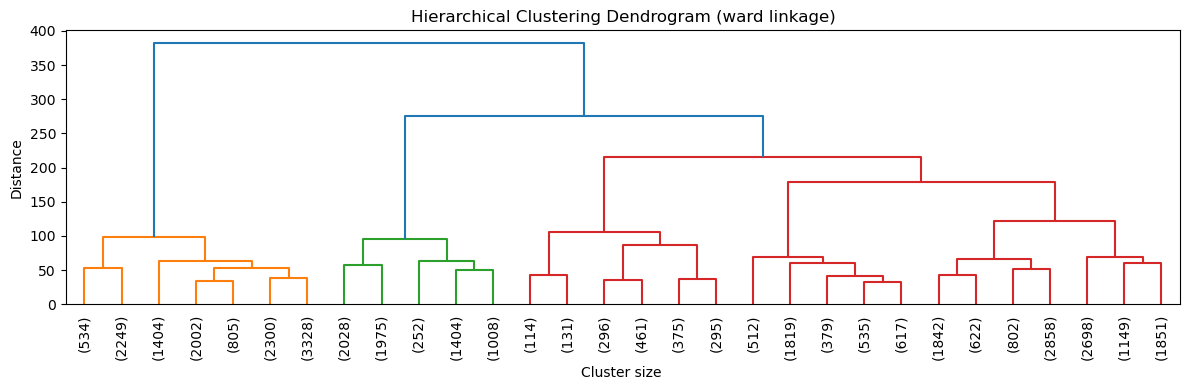


 COMPLETE LINKAGE 


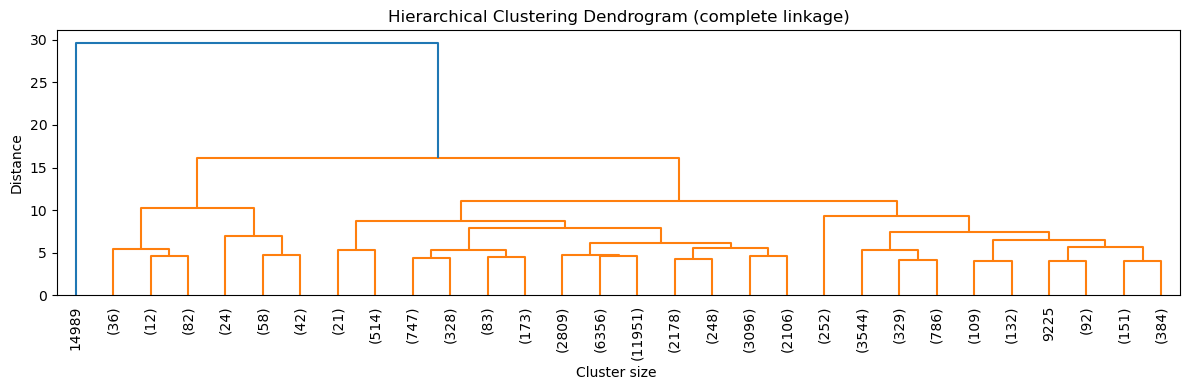


 AVERAGE LINKAGE 


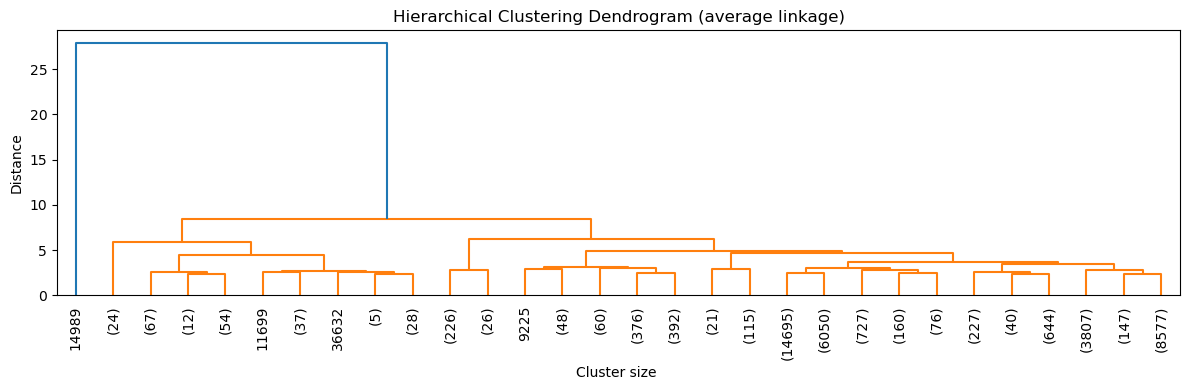


 SINGLE LINKAGE 


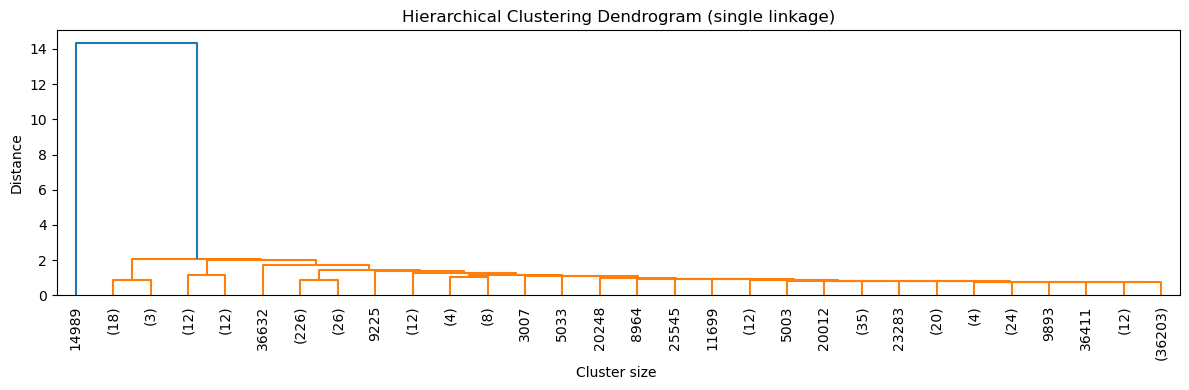

In [79]:

# List of linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method
for method in linkage_methods:
    print(f"\n {method.upper()} LINKAGE ")
    
    # Compute linkage
    Z = linkage(X_cluster, method=method)
    
    # Plot dendrogram 
    plt.figure(figsize=(12, 4))
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    dendrogram(Z, 
               truncate_mode='lastp', 
               p=30, 
               leaf_rotation=90., 
               leaf_font_size=10.)
    plt.xlabel("Cluster size ")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()
    

From the linkage methods shown above, we can see that:
- Ward linkage dendrogram gave the clearest and most balanced cluster , showing three cluster structure which matches with the K - means results.
- Average linkage shows a clear two cluster structure with the option to extract 3-4 clusters at lower levels.
- Complete Linkage dendogram also showed a dominant two cluster sepration.
- Single linkage did not form clear well sperated clusters and it is not suitable for finding meqanful cluster here.


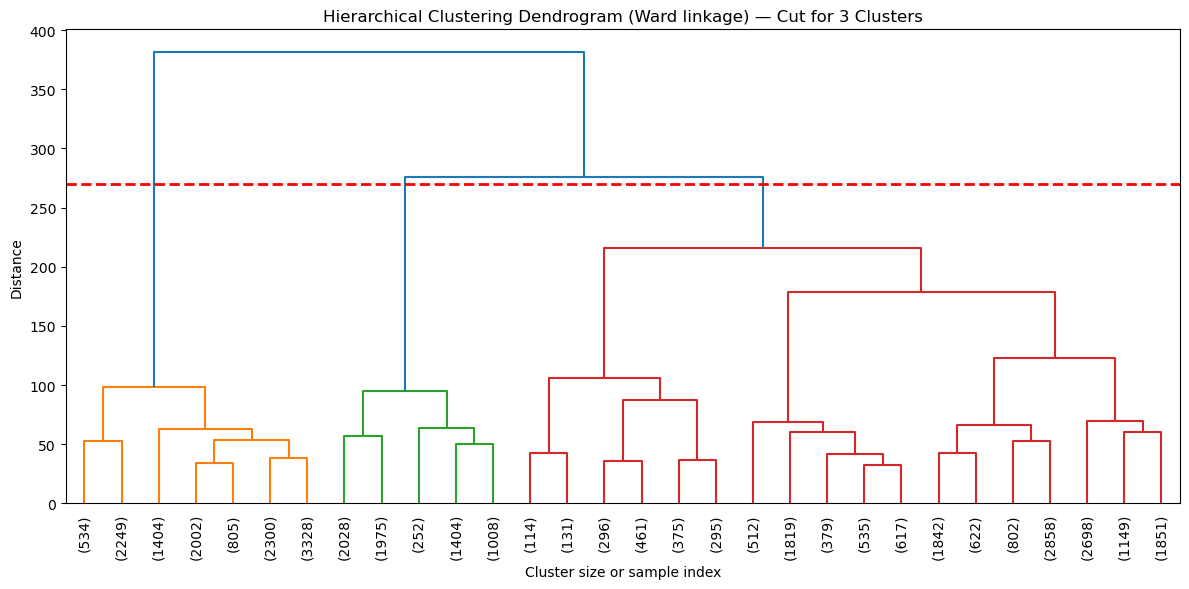

In [39]:
#ward dendrogram
Z = linkage(X_cluster, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z,
           truncate_mode='lastp',  
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.)

# Plot horizontal line to show cut s
plt.axhline(y=270, color='red', linestyle='--', linewidth=2)

plt.title('Hierarchical Clustering Dendrogram (Ward linkage) - Cut for 3 Clusters')
plt.xlabel('Cluster size or sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()



Cluster 0
mortality_rate: 38.67
corruption_index: 0.66
physicians_per_1000: 0.25
beds_per_1000: 0.36
health_expenditure_per_capita: 363.61
percent_gdp_spent_on_healthcare: 21.51
happinessscore: 2.40
Cluster: 0.00

Cluster 1
mortality_rate: 37.74
corruption_index: 0.48
physicians_per_1000: 1.92
beds_per_1000: 2.85
health_expenditure_per_capita: 1566.04
percent_gdp_spent_on_healthcare: 6.55
happinessscore: 5.46
Cluster: 1.00

Cluster 2
mortality_rate: 2198.44
corruption_index: 0.84
physicians_per_1000: 0.14
beds_per_1000: 0.66
health_expenditure_per_capita: 122.07
percent_gdp_spent_on_healthcare: 4.55
happinessscore: 3.79
Cluster: 2.00


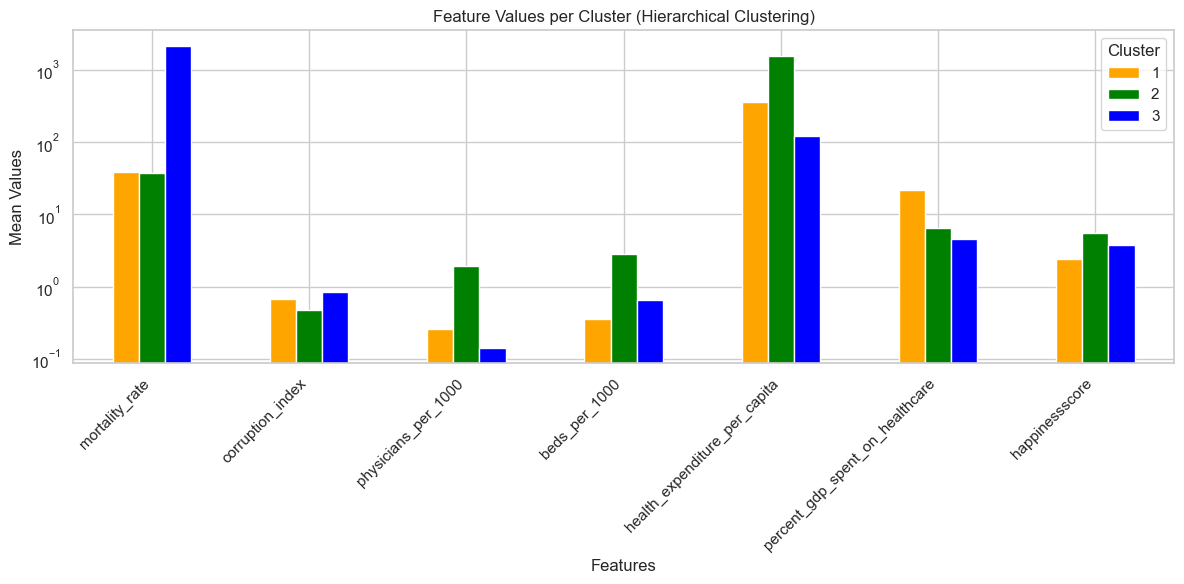

In [109]:


# Extract 3 cluster labels
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')
df['Hierarchical_Ward_Cluster'] = hierarchical_labels

# List of numerical columns 
num_cols = [
    'mortality_rate', 'corruption_index', 'physicians_per_1000', 'beds_per_1000',
    'health_expenditure_per_capita', 'percent_gdp_spent_on_healthcare', 'happinessscore'
]

# Print mean values per cluster
for cluster_id in sorted(df['Hierarchical_Ward_Cluster'].unique()):
    print(f"\nCluster {cluster_id - 1}")  
    
    cluster_data = df[df['Hierarchical_Ward_Cluster'] == cluster_id]
    
    for col in num_cols:
        mean_value = cluster_data[col].mean()
        print(f"{col}: {mean_value:.2f}")
        
    print(f"Cluster: {cluster_id - 1:.2f}")  

# Prepare cluster means dataframe
cluster_means = df.groupby('Hierarchical_Ward_Cluster')[num_cols].mean()

# Cluster colors
cluster_colors = {1: 'orange', 2: 'green', 3: 'blue'}

# Transpose the dataframe 
cluster_means_T = cluster_means.T

# Bar plot
ax = cluster_means_T.plot(kind='bar', figsize=(12,6), 
                          color=[cluster_colors[cluster] for cluster in cluster_means_T.columns])

# Title and labels
plt.title("Feature Values per Cluster (Hierarchical Clustering)")
plt.ylabel("Mean Values")
plt.xlabel("Features")
plt.yscale('log')  
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()


Cluster 0 is likely consits of low income with poor healthcare systems and high corruption.

Cluster  1 is wealthy, developed countries with well funded healthcare systems, low corruption and high happiness score.

Cluster 2 is likely to represent middle income countries with reasonanble good healthcare but still facing moderate corruption and high mortality.